<a href="https://colab.research.google.com/github/bryaanabraham/Machine_Learning/blob/main/Magic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset contains information with target variable showing whether a g(gamma) or h(hadron) particle is present.<br>
The following model will attempt to predict the target variable "class".

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [ ]:
cols=["fLenght", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3long", "fM3trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("magic04.data", names=cols)
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3long,fM3trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df["class"].unique()

array([1, 0])

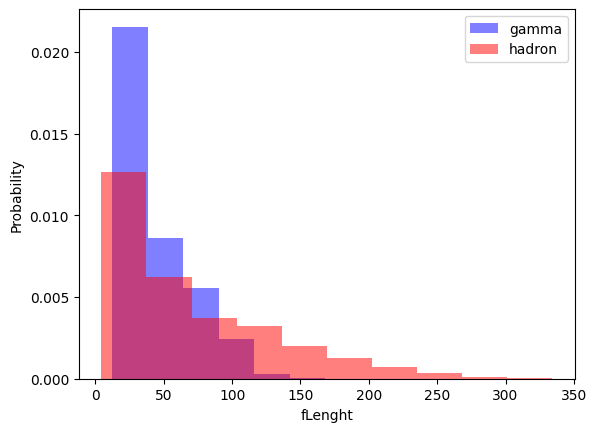

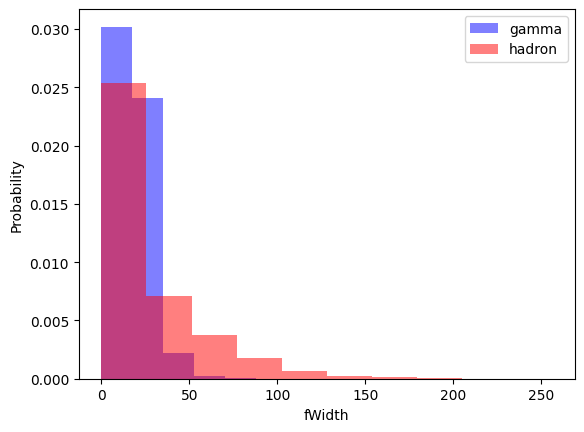

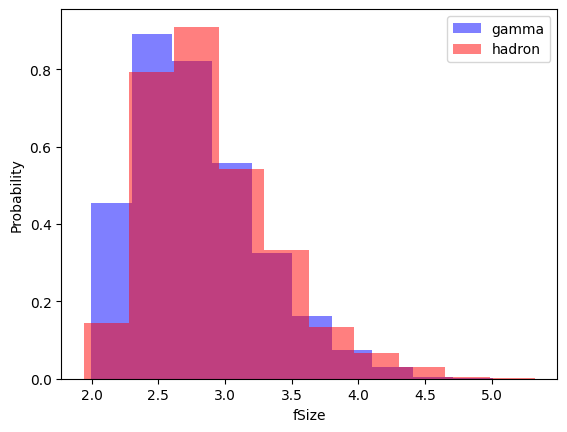

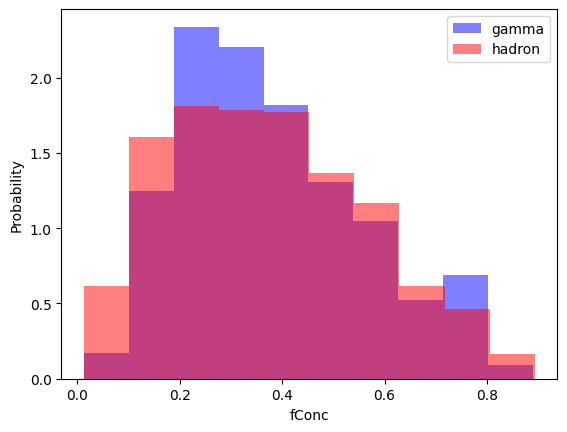

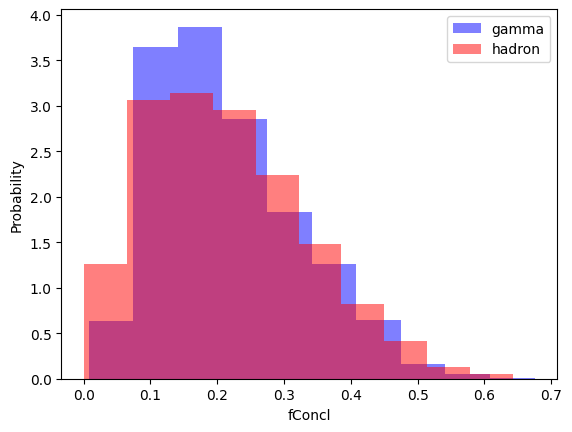

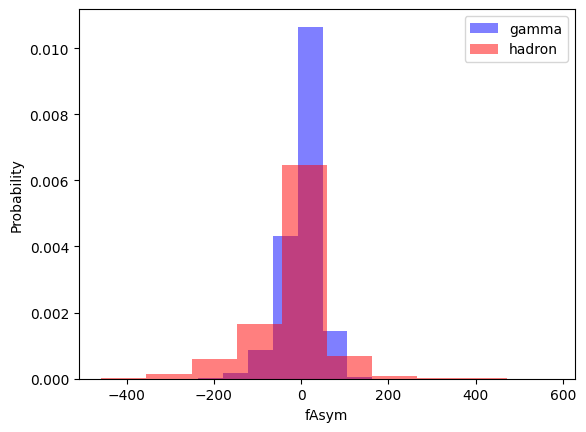

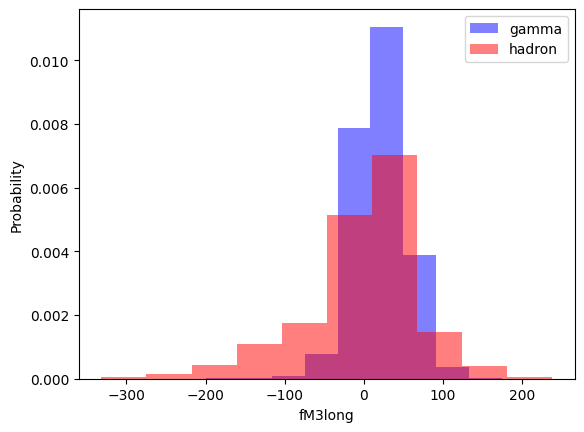

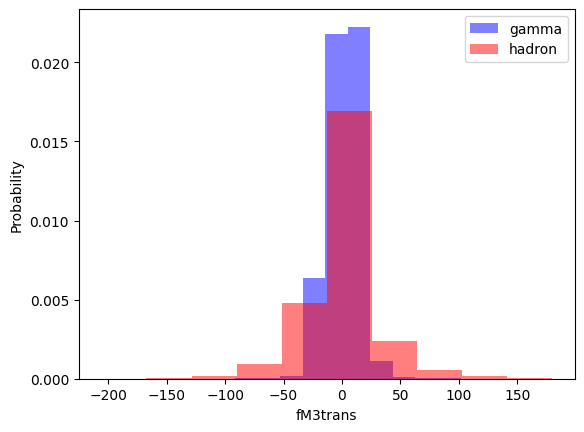

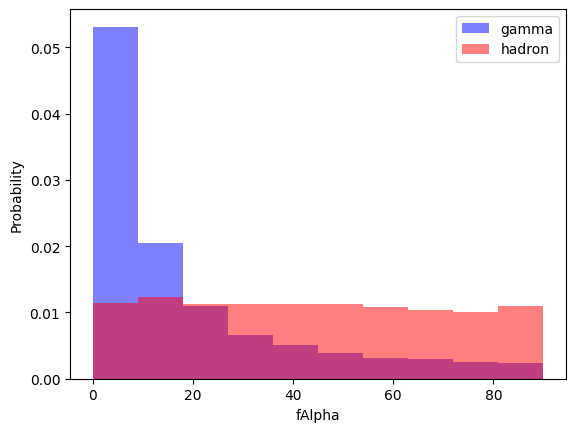

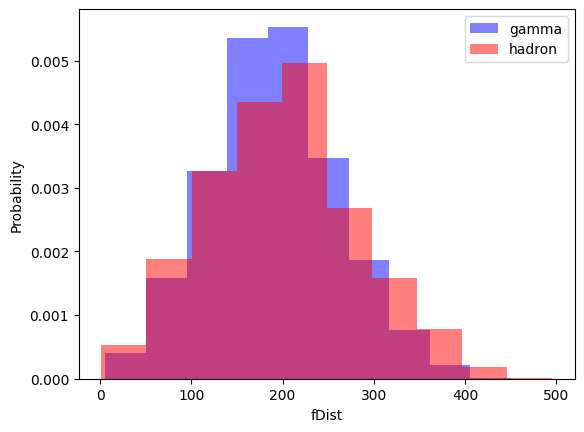

In [ ]:
for labels in cols[:-1]:
  plt.hist(df[df["class"]==1][labels],color='blue', label='gamma', alpha=0.5, density=True)
  plt.hist(df[df["class"]==0][labels],color='red', label='hadron', alpha=0.5, density=True)
  plt.ylabel("Probability")
  plt.xlabel(labels)
  plt.legend()
  plt.show()

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
X_train, y_train = train[train.columns[:-1]].values, train[train.columns[-1]].values
X_valid, y_valid = valid[valid.columns[:-1]].values, valid[valid.columns[-1]].values
X_test, y_test = test[test.columns[:-1]].values, test[test.columns[-1]].values

In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7428
3984


since the number of values representing hadron and gamma are not the same i.e. the dataset does not conclude to same number of gamma and haddron variable, we may need to use random oversampling in a function which will equalize the count of zeroes and ones in the target attribute.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

We must scale the values in the dataset to lie between required range to carry out mathematical operations.<br>
we use reshape to ensure the dimensions of X and Y are same i.e. X is a 2D array but Y is a 1D array consisting of just the colums values of class(col[-1]).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler=StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1,1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

NaN or missing values need to be eliminated by filling in mean values

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming X_train is your feature matrix with missing values
imputer = SimpleImputer(strategy='mean')  # You can choose strategy: 'mean', 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)


Oversampling is not done for validation and testing as we will receive random data and we need to trust our dataset will proud accurate results for any number of values of 'h' and 'g'

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_imputed, y_train)

KNeighborsClassifier()

In [ ]:
y_pred =knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1340
           1       0.86      0.87      0.86      2464

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.52      1340
           1       0.74      0.90      0.81      2464

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1340
           1       0.85      0.83      0.84      2464

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



##Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC() #parameters can be passed as needed
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1340
           1       0.89      0.90      0.90      2464

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



##Neural Networks

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train', 'validation'], loc='upper left')
  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['train', 'validation'], loc='upper left')
  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')#We scale the values between 0 and 1 so we can set the values as 0(for <0.5) and 1 (for>0.5)
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

num_nodes = 16, dopout_prob=0, learning_rate = 0.001, batch_size = 32


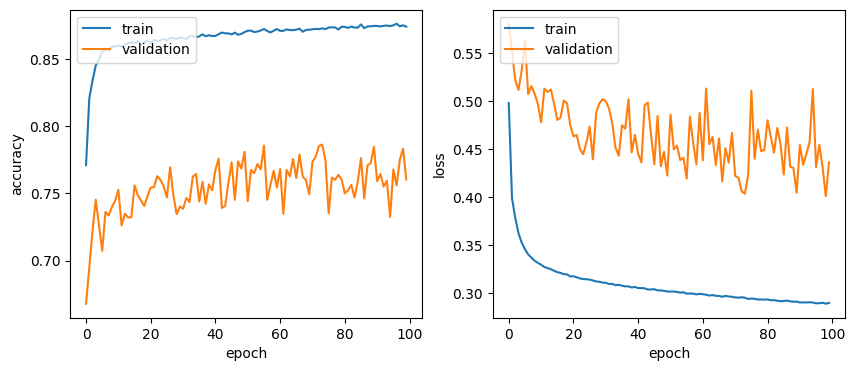

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8712
num_nodes = 16, dopout_prob=0, learning_rate = 0.001, batch_size = 64


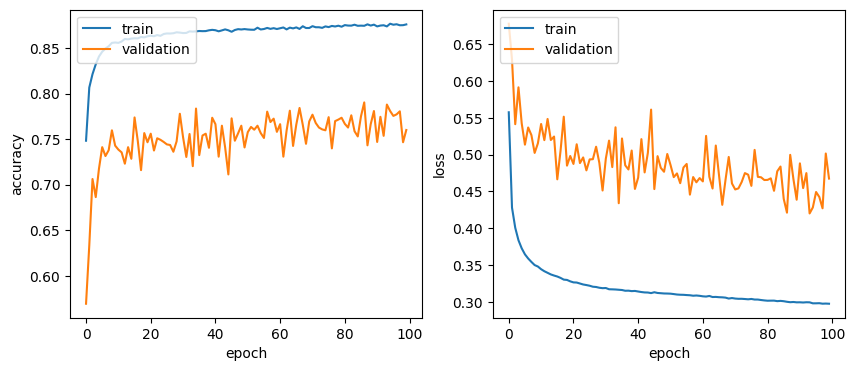

119/119 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8693
num_nodes = 16, dopout_prob=0, learning_rate = 0.001, batch_size = 128


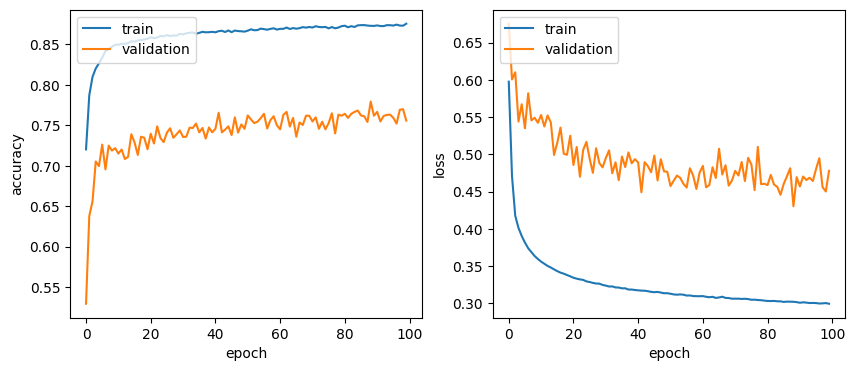

119/119 [==============================] - 0s 2ms/step - loss: 0.3147 - accuracy: 0.8725
num_nodes = 16, dopout_prob=0, learning_rate = 0.005, batch_size = 32


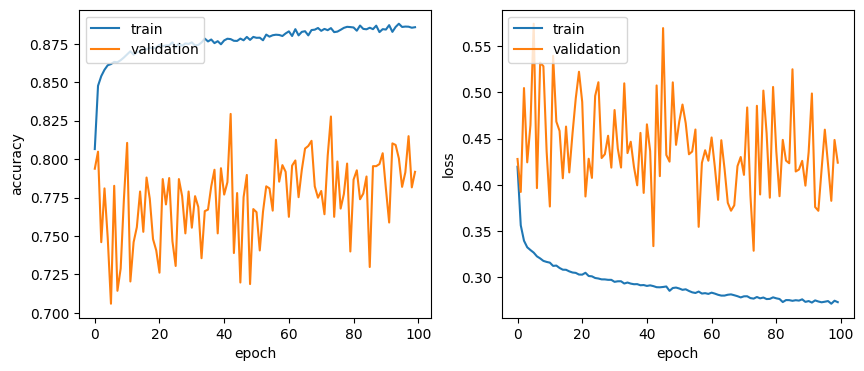

119/119 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8715
num_nodes = 16, dopout_prob=0, learning_rate = 0.005, batch_size = 64


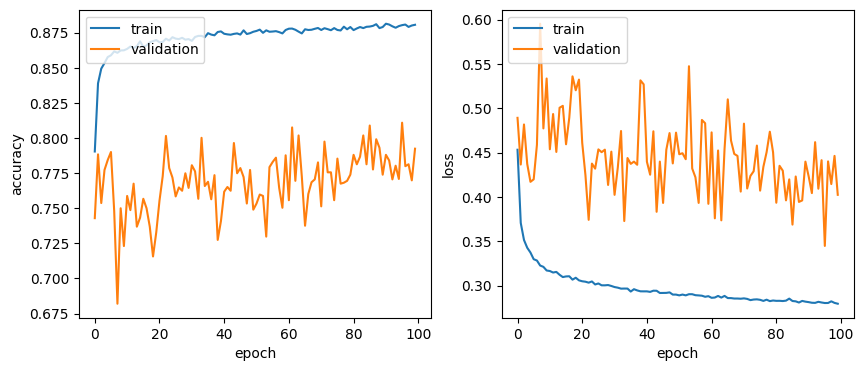

119/119 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8609
num_nodes = 16, dopout_prob=0, learning_rate = 0.005, batch_size = 128


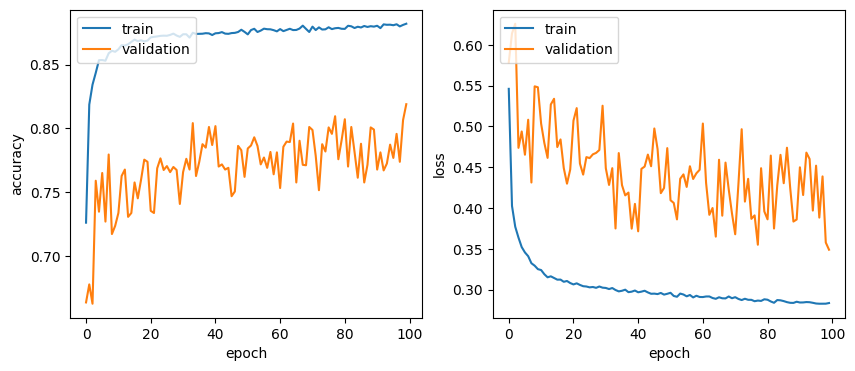

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8662
num_nodes = 16, dopout_prob=0, learning_rate = 0.01, batch_size = 32


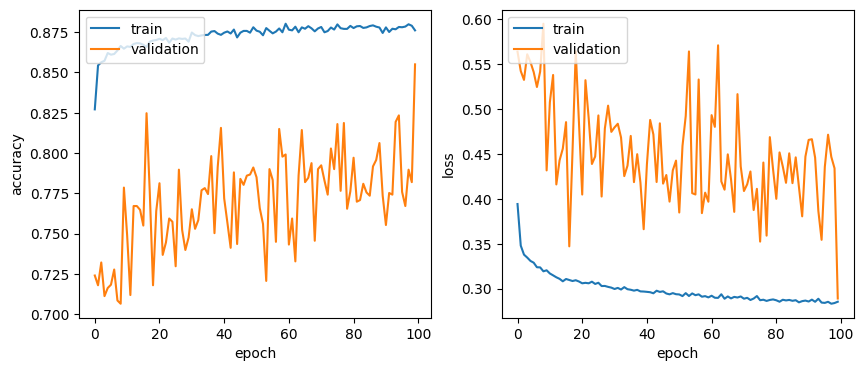

119/119 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8494
num_nodes = 16, dopout_prob=0, learning_rate = 0.01, batch_size = 64


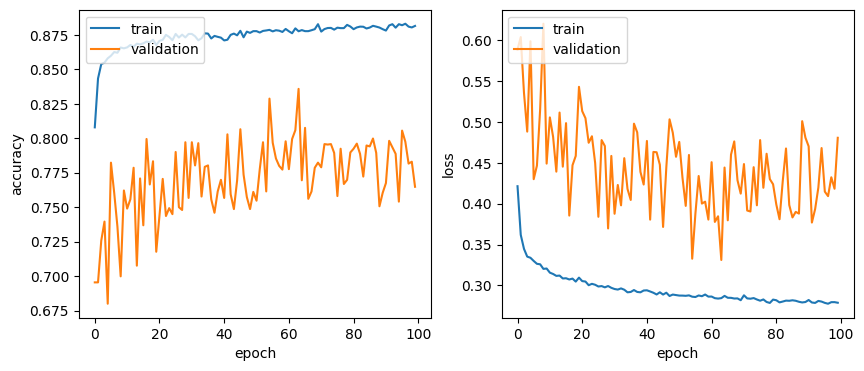

119/119 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8665
num_nodes = 16, dopout_prob=0, learning_rate = 0.01, batch_size = 128


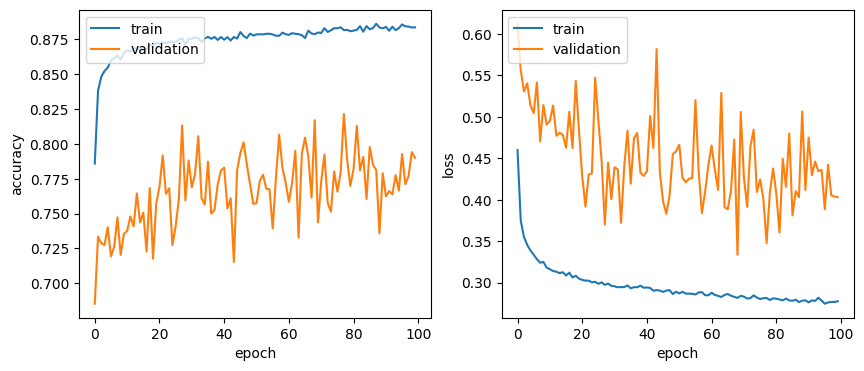

119/119 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8743
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.001, batch_size = 32


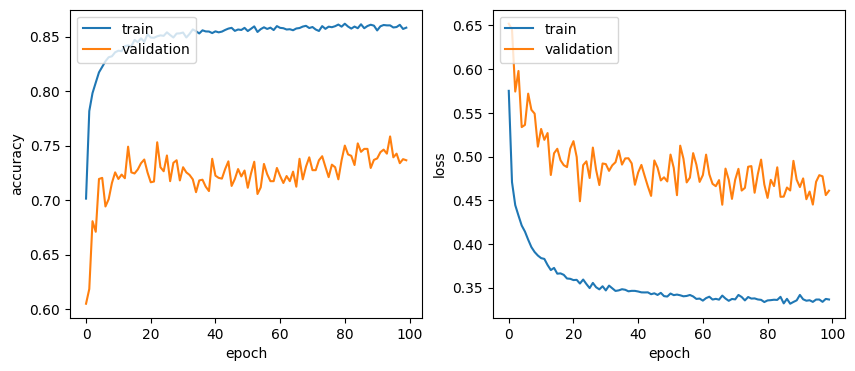

119/119 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8733
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.001, batch_size = 64


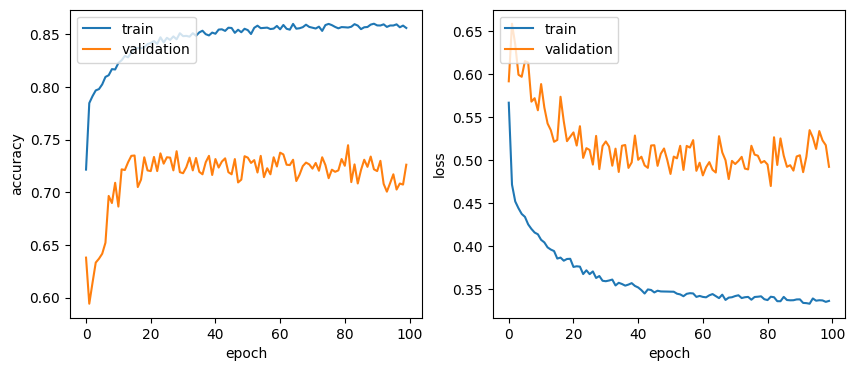

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8683
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.001, batch_size = 128


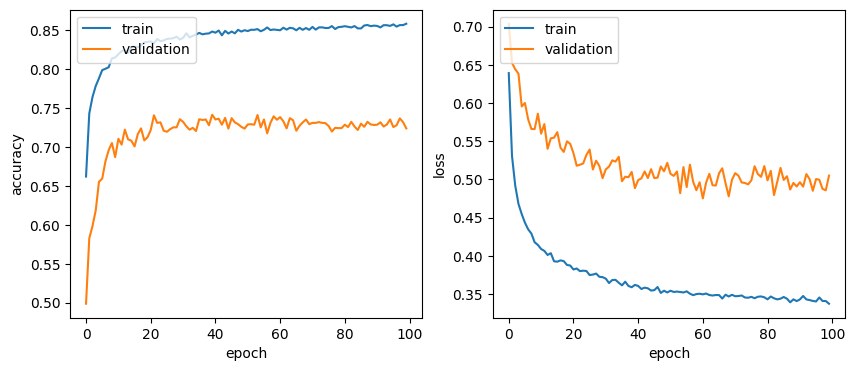

119/119 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8672
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.005, batch_size = 32


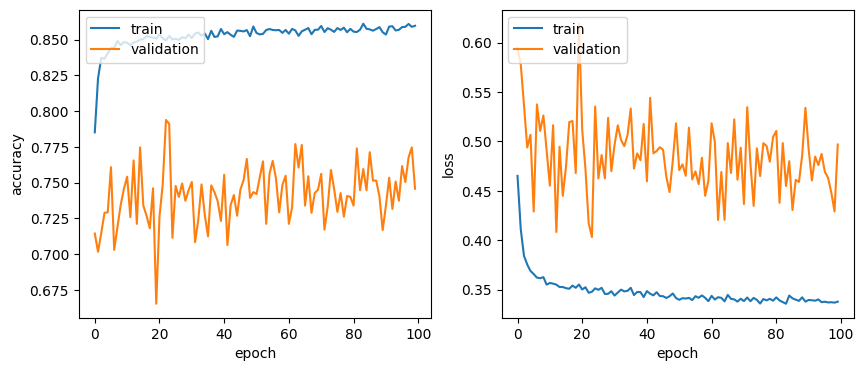

119/119 [==============================] - 0s 2ms/step - loss: 0.3199 - accuracy: 0.8638
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.005, batch_size = 64


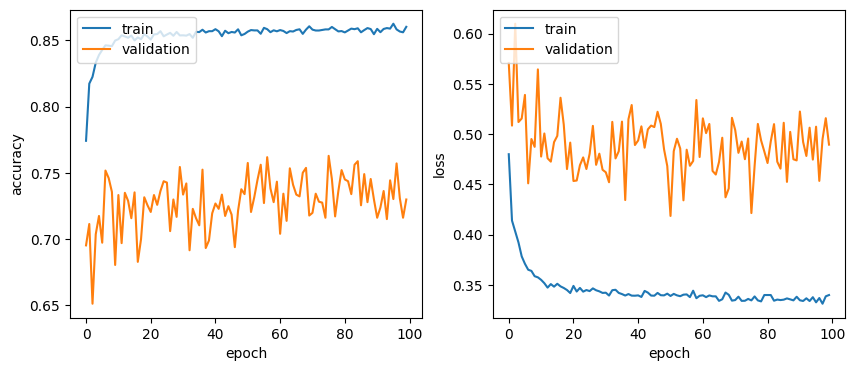

119/119 [==============================] - 0s 3ms/step - loss: 0.3201 - accuracy: 0.8688
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.005, batch_size = 128


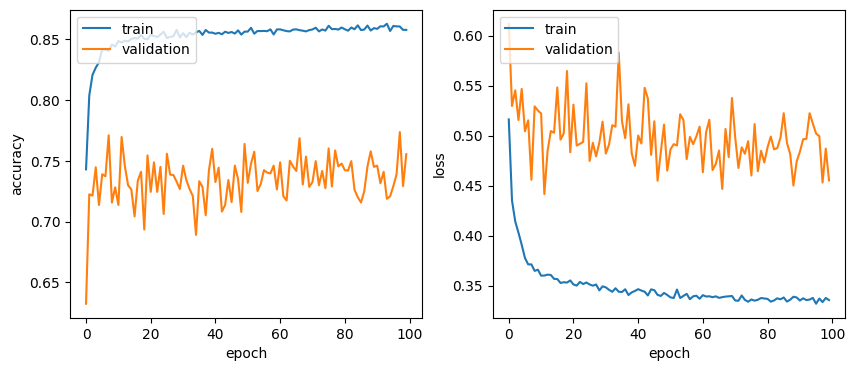

119/119 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8715
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.01, batch_size = 32


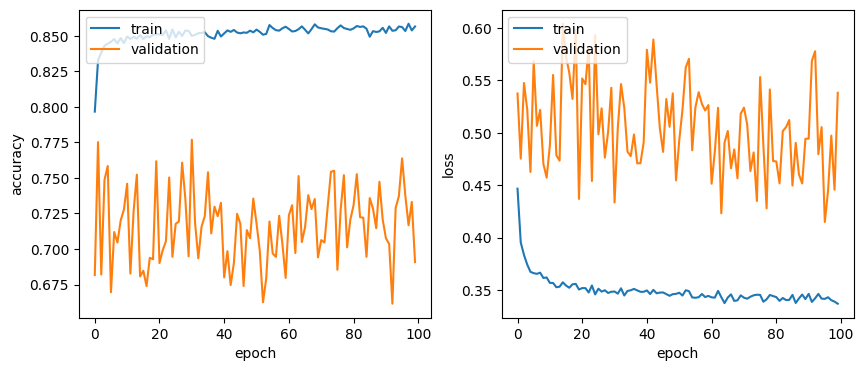

119/119 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8609
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.01, batch_size = 64


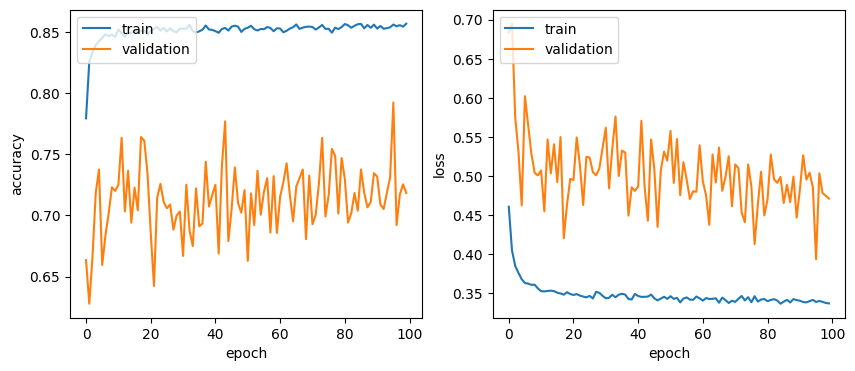

119/119 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8699
num_nodes = 16, dopout_prob=0.2, learning_rate = 0.01, batch_size = 128


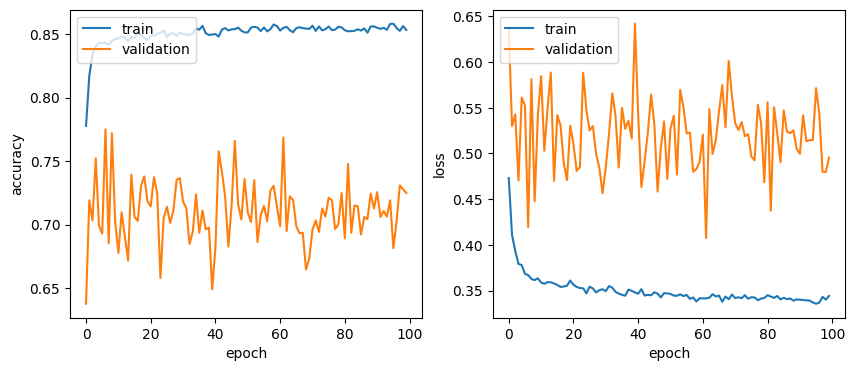

119/119 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8699
num_nodes = 32, dopout_prob=0, learning_rate = 0.001, batch_size = 32


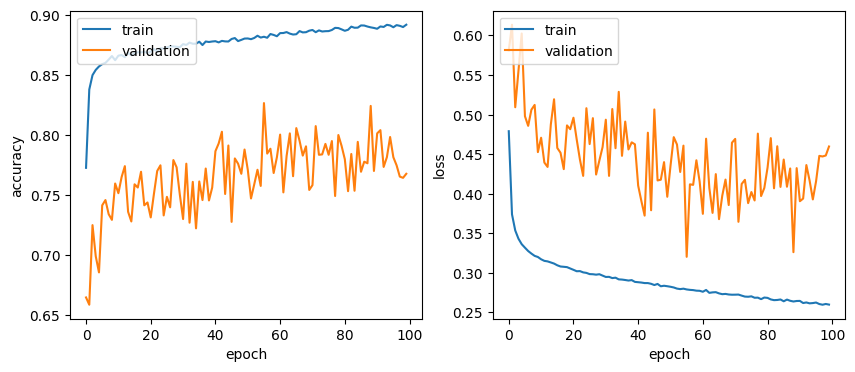

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8693
num_nodes = 32, dopout_prob=0, learning_rate = 0.001, batch_size = 64


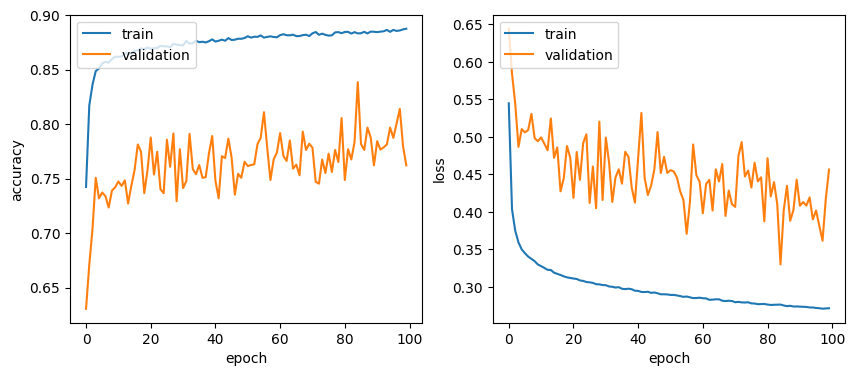

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8754
num_nodes = 32, dopout_prob=0, learning_rate = 0.001, batch_size = 128


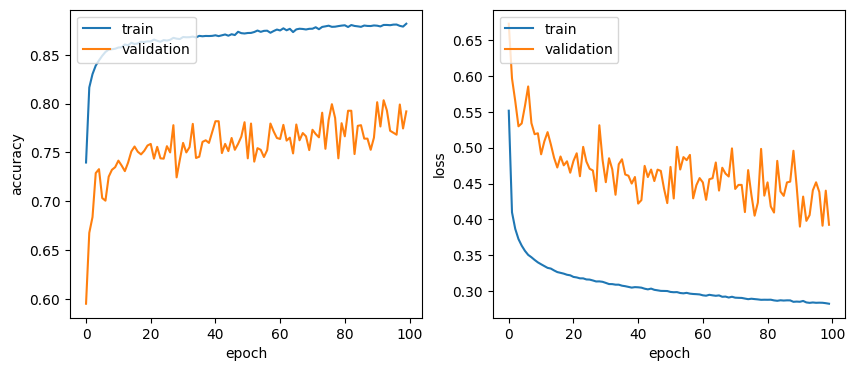

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8743
num_nodes = 32, dopout_prob=0, learning_rate = 0.005, batch_size = 32


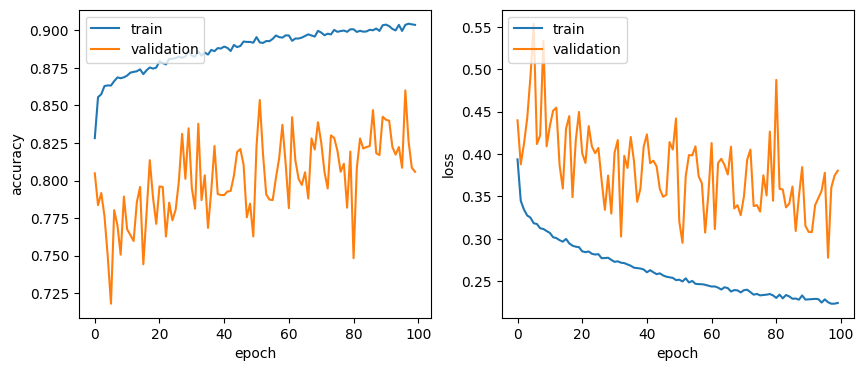

119/119 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8615
num_nodes = 32, dopout_prob=0, learning_rate = 0.005, batch_size = 64


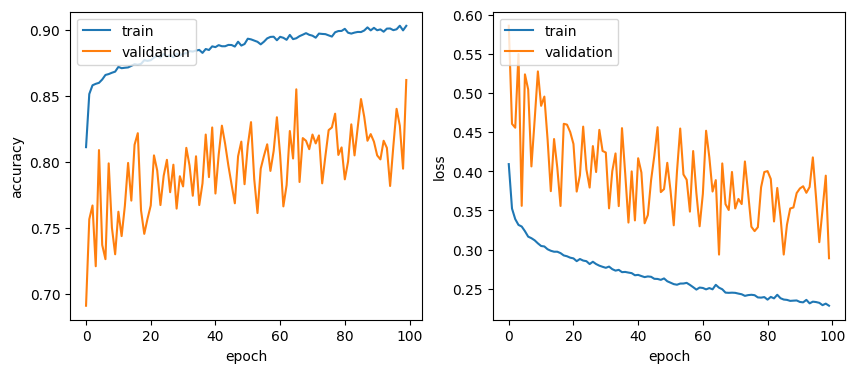

119/119 [==============================] - 0s 2ms/step - loss: 0.3637 - accuracy: 0.8596
num_nodes = 32, dopout_prob=0, learning_rate = 0.005, batch_size = 128


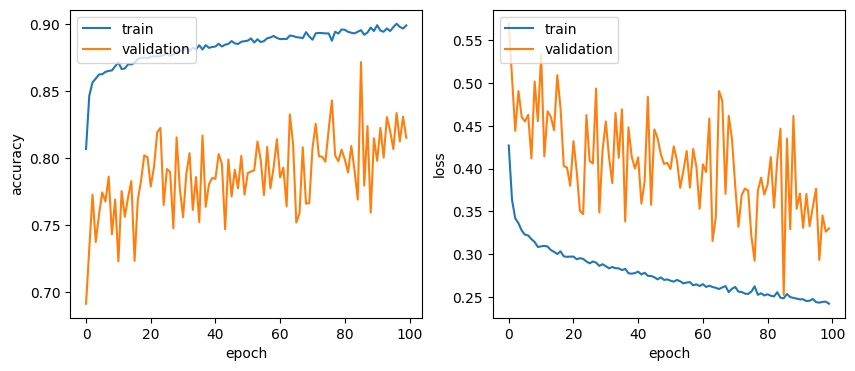

119/119 [==============================] - 0s 2ms/step - loss: 0.3577 - accuracy: 0.8591
num_nodes = 32, dopout_prob=0, learning_rate = 0.01, batch_size = 32


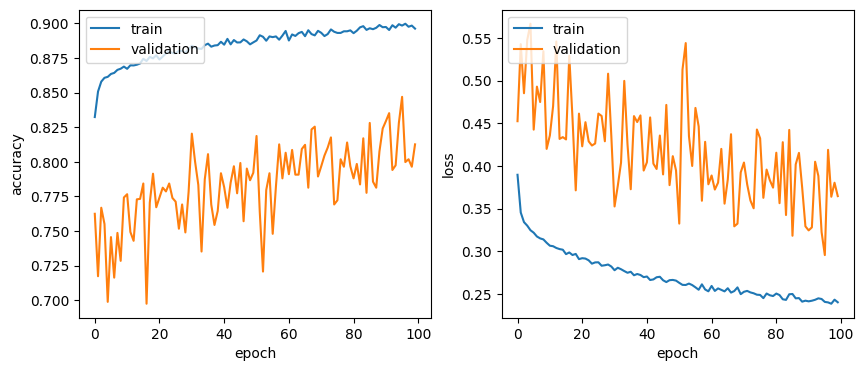

119/119 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8659
num_nodes = 32, dopout_prob=0, learning_rate = 0.01, batch_size = 64


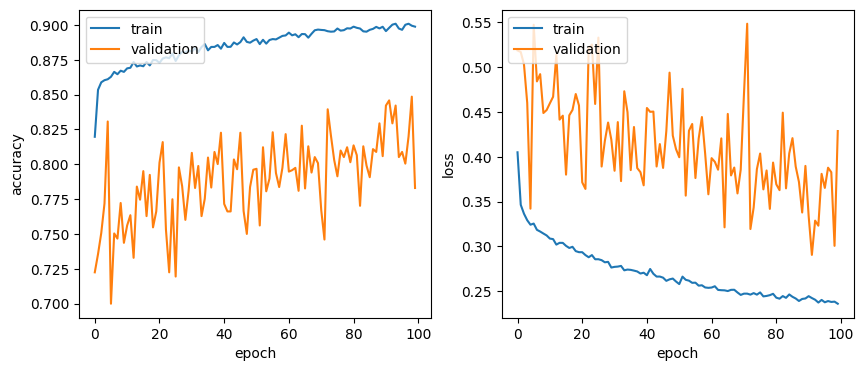

119/119 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8636
num_nodes = 32, dopout_prob=0, learning_rate = 0.01, batch_size = 128


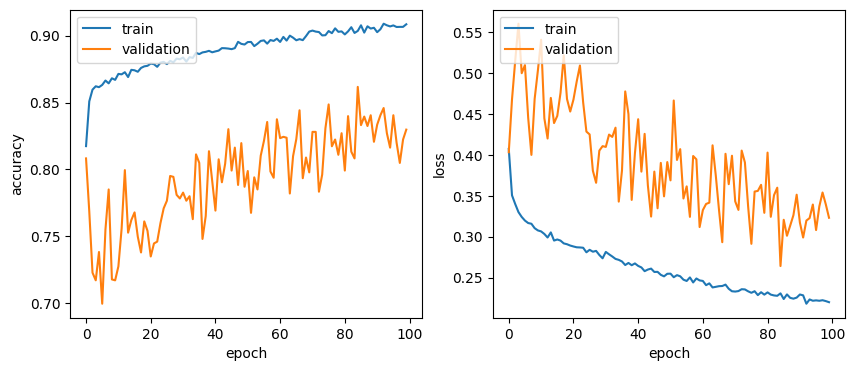

119/119 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8620
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.001, batch_size = 32


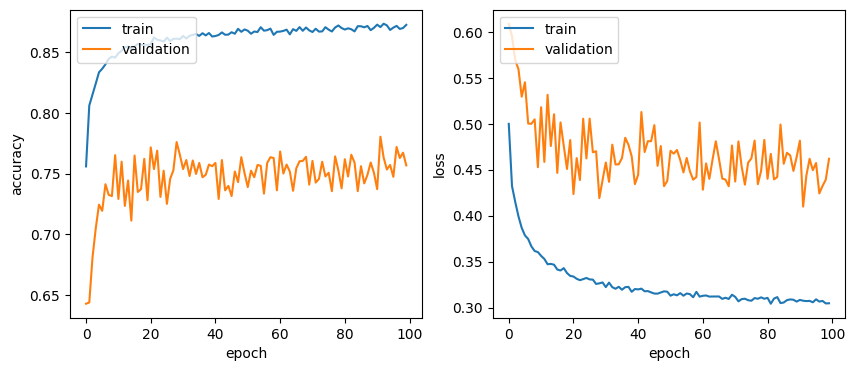

119/119 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8733
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.001, batch_size = 64


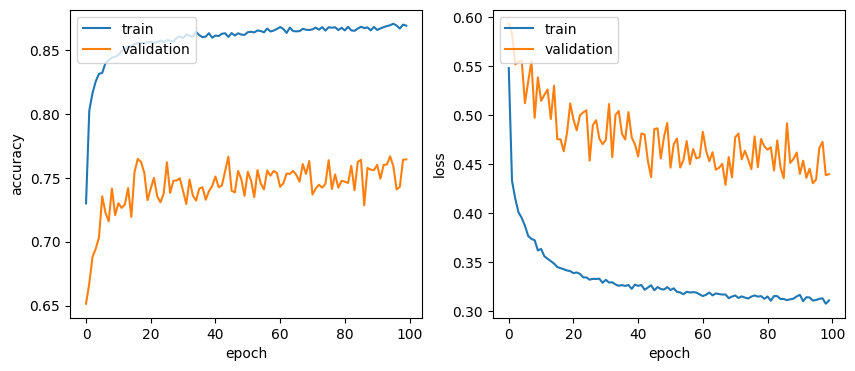

119/119 [==============================] - 0s 4ms/step - loss: 0.3051 - accuracy: 0.8764
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.001, batch_size = 128


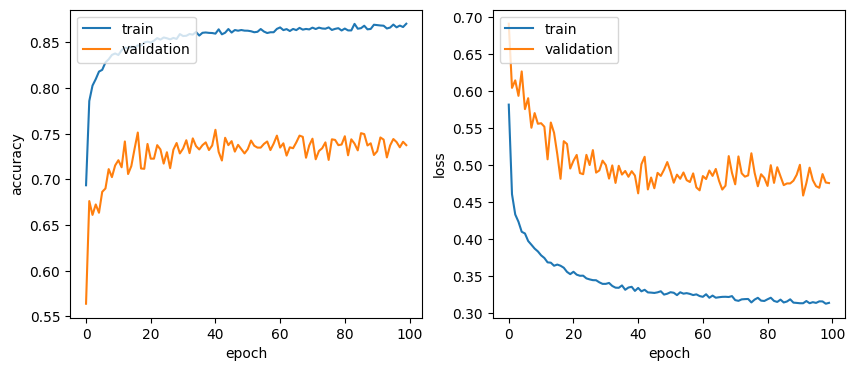

119/119 [==============================] - 0s 3ms/step - loss: 0.3082 - accuracy: 0.8749
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.005, batch_size = 32


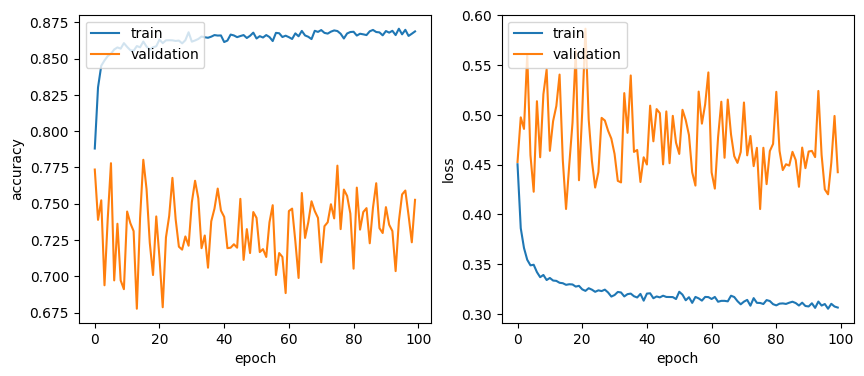

119/119 [==============================] - 0s 2ms/step - loss: 0.3068 - accuracy: 0.8743
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.005, batch_size = 64


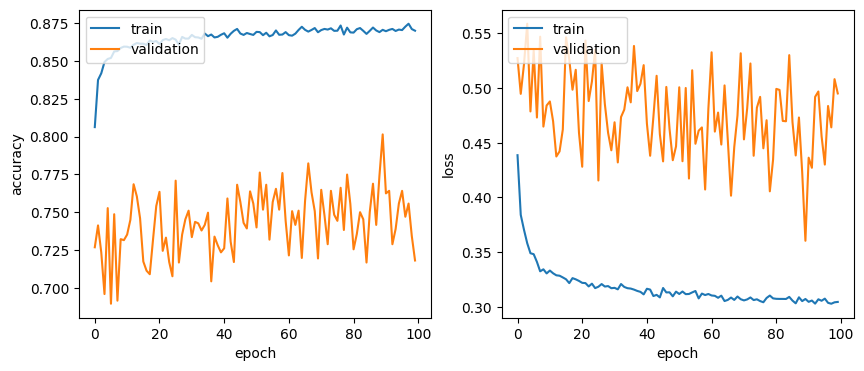

119/119 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8759
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.005, batch_size = 128


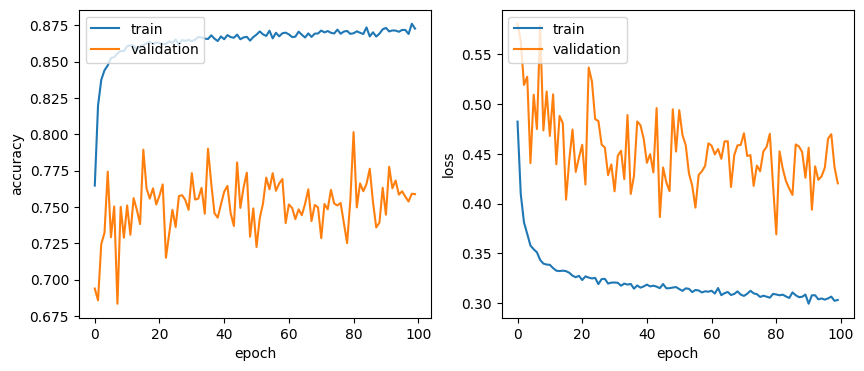

119/119 [==============================] - 0s 2ms/step - loss: 0.3042 - accuracy: 0.8772
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.01, batch_size = 32


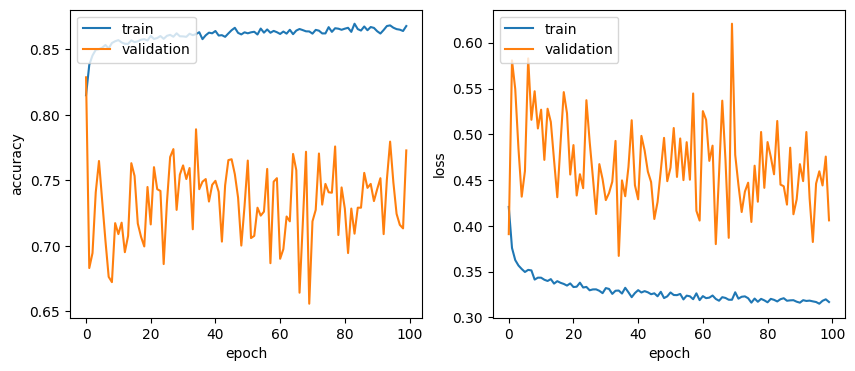

119/119 [==============================] - 0s 3ms/step - loss: 0.3150 - accuracy: 0.8754
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.01, batch_size = 64


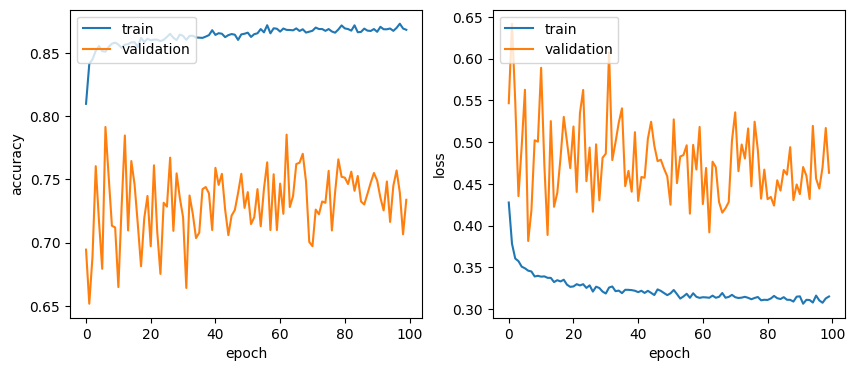

119/119 [==============================] - 0s 3ms/step - loss: 0.3167 - accuracy: 0.8707
num_nodes = 32, dopout_prob=0.2, learning_rate = 0.01, batch_size = 128


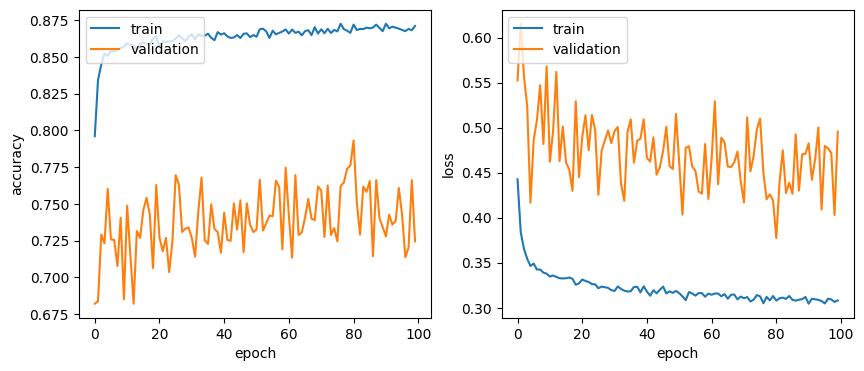

119/119 [==============================] - 0s 2ms/step - loss: 0.3087 - accuracy: 0.8751
num_nodes = 64, dopout_prob=0, learning_rate = 0.001, batch_size = 32


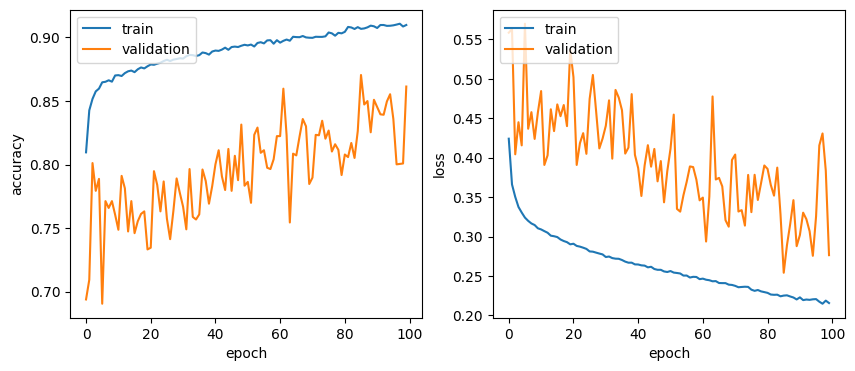

119/119 [==============================] - 0s 3ms/step - loss: 0.3597 - accuracy: 0.8554
num_nodes = 64, dopout_prob=0, learning_rate = 0.001, batch_size = 64


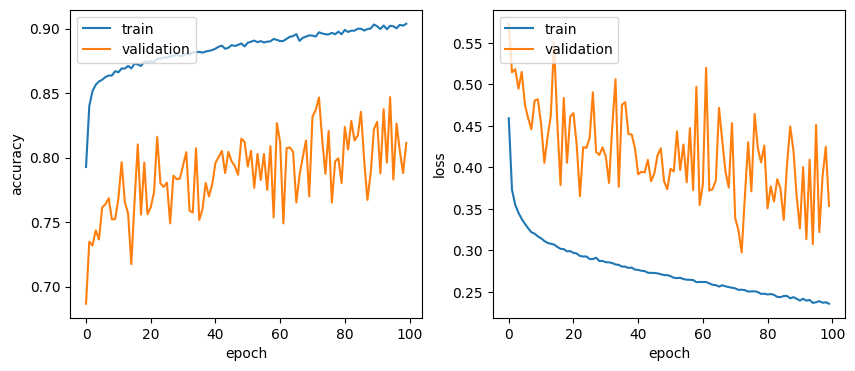

119/119 [==============================] - 0s 3ms/step - loss: 0.3239 - accuracy: 0.8736
num_nodes = 64, dopout_prob=0, learning_rate = 0.001, batch_size = 128


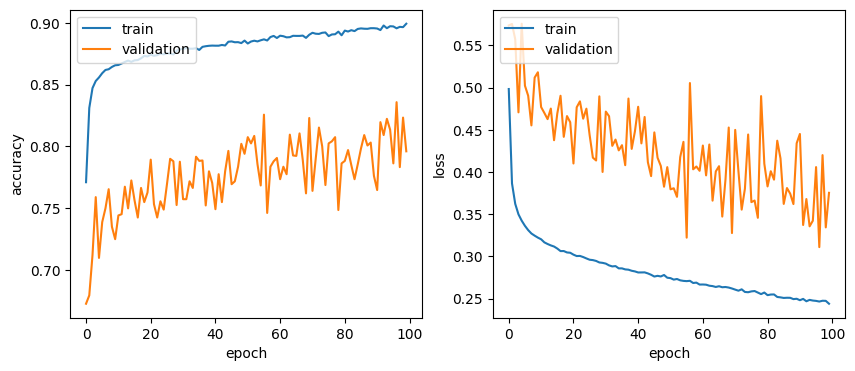

119/119 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.8709
num_nodes = 64, dopout_prob=0, learning_rate = 0.005, batch_size = 32


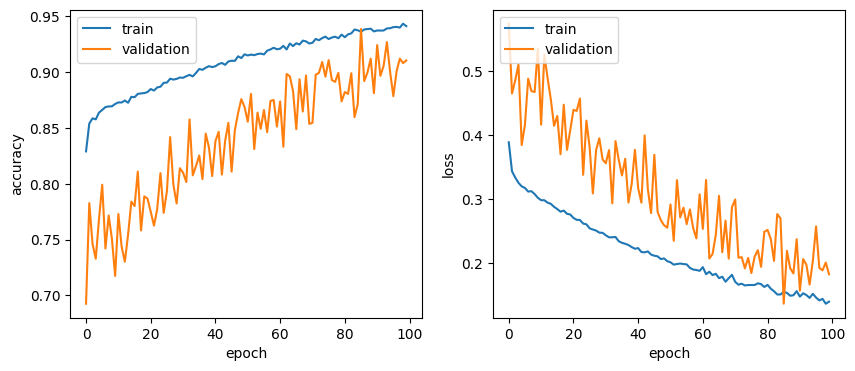

119/119 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.8462
num_nodes = 64, dopout_prob=0, learning_rate = 0.005, batch_size = 64


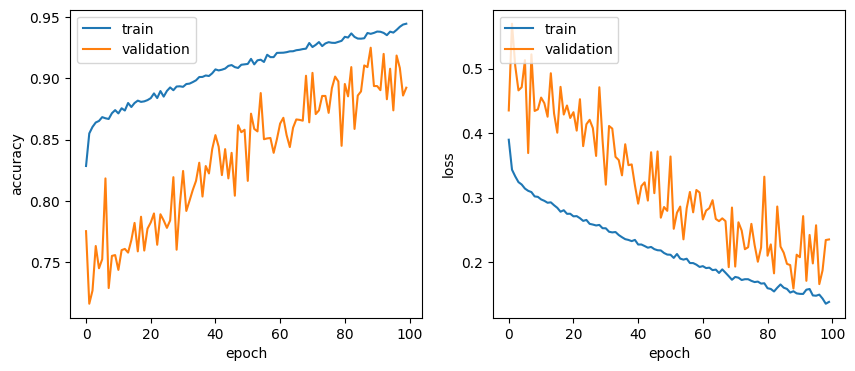

119/119 [==============================] - 0s 3ms/step - loss: 0.5253 - accuracy: 0.8612
num_nodes = 64, dopout_prob=0, learning_rate = 0.005, batch_size = 128


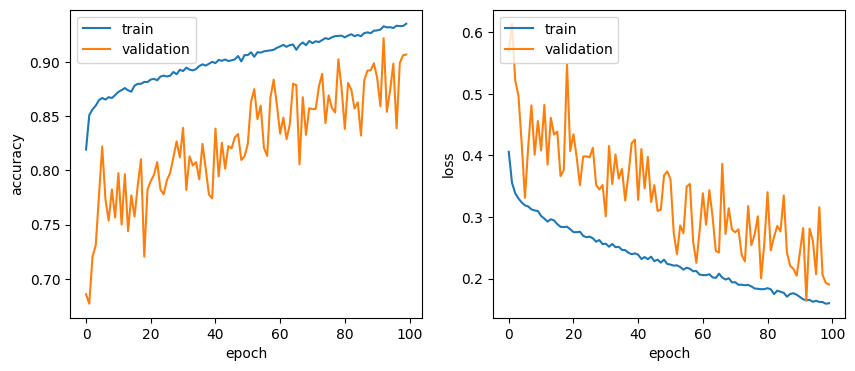

119/119 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.8520
num_nodes = 64, dopout_prob=0, learning_rate = 0.01, batch_size = 32


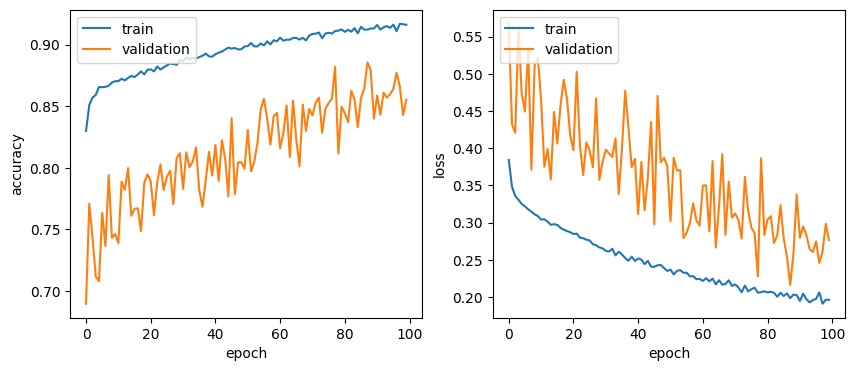

119/119 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.8686
num_nodes = 64, dopout_prob=0, learning_rate = 0.01, batch_size = 64


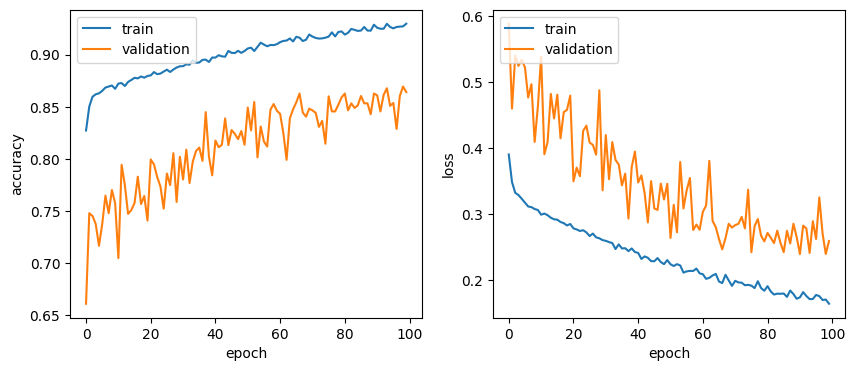

119/119 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.8651
num_nodes = 64, dopout_prob=0, learning_rate = 0.01, batch_size = 128


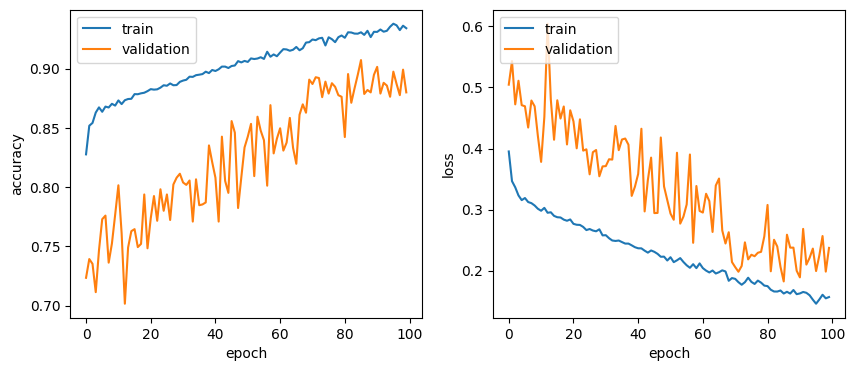

119/119 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.8546
num_nodes = 64, dopout_prob=0.2, learning_rate = 0.001, batch_size = 32


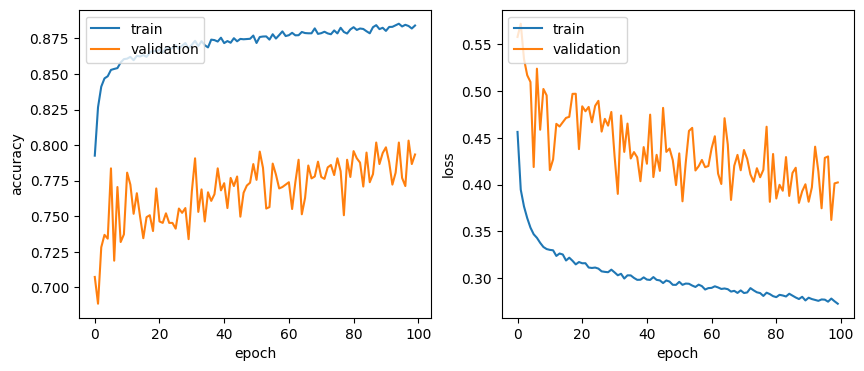

119/119 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8778


KeyboardInterrupt: ignored

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for learning_rate in [0.001, 0.005, 0.01]:
      for batch_size in [32, 64, 128]:
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, learning_rate, batch_size, epochs)
        print(f"num_nodes = {num_nodes}, dopout_prob={dropout_prob}, learning_rate = {learning_rate}, batch_size = {batch_size}")
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model